<a href="https://colab.research.google.com/github/limrpoty/DungeonClash/blob/main/Tarefa_Nivelamento_An%C3%A1lise_Explorat%C3%B3ria_dos_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Crie um notebook no Google Colab, carregue o arquivo do dataset, realize a análise exploratória dos dados. Compartilhe e envie o link do notebook.

Dataset indicado: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

Algumas técnicas sugeridas (generalizadas para AED em geral, não pro dataset específico):

- Estatísticas Descritivas Básicas
  - Calcular médias, medianas, desvios padrão para cada coluna numérica
  - Identificar valores mínimos e máximos
  - Verificar a distribuição dos dados em cada feature

- Análise da Variável Target (label)
  - Contagem de exemplos por classe (quantos são 0 vs 1)
  - Proporção entre classes (para ver se está balanceado)

Correlação entre Variáveis
  - Matriz de correlação entre todas as features numéricas
  - Identificar quais features estão mais correlacionadas com o label

- Analisar Valores Extremos
  - Identificar outliers em cada feature
  - Verificar se outliers estão concentrados em alguma classe específica

- Análise de Features Específicas

- Relações entre Features

- Dados Faltantes

- Visualizações Sugeridas
  - Heatmap da matriz de correlação
  - Pairplot para relações entre features
  - Boxplots comparando distribuições por classe
  - Scatter plots para relações entre pares de features importantes

Análise por Agrupamentos
  - Clusterização não supervisionada para ver se os dados formam grupos naturais
  - Comparar esses grupos com as labels verdadeiras

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

dwd = pd.DataFrame(df).describe()

print(dwd)

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

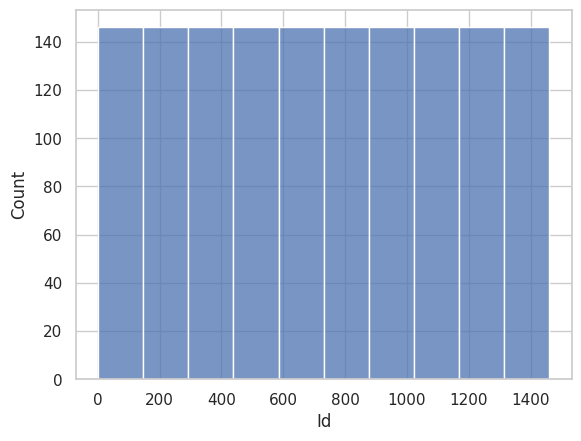

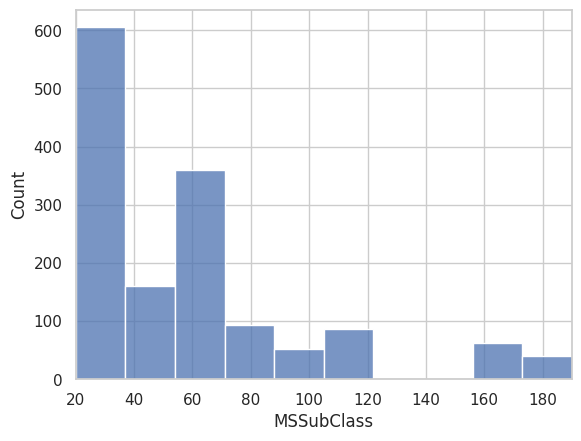

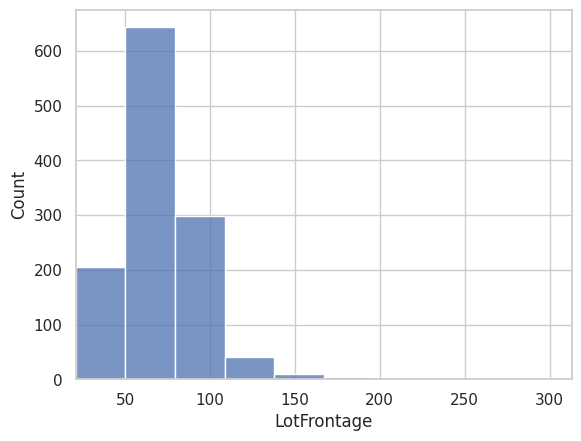

In [9]:
sns.set(style="whitegrid")

sns.histplot(data=df, x=df['Id'], bins=10)
plt.show()

sns.histplot(data=df, x=df['MSSubClass'], bins=10)
plt.xlim(df['MSSubClass'].min(), df['MSSubClass'].max())
plt.show()

sns.histplot(data=df, x=df['LotFrontage'], bins=10)
plt.xlim(df['LotFrontage'].min(), df['LotFrontage'].max())
plt.show()


Colunas Numéricas: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Colunas Categóricas: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 

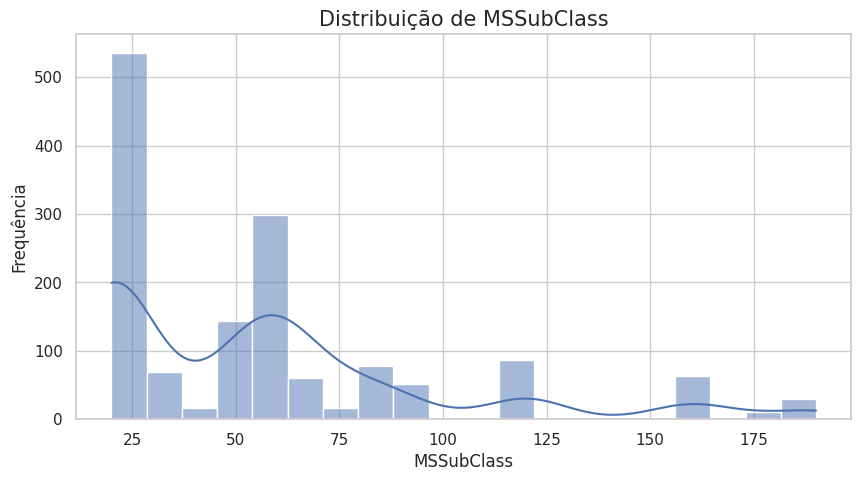

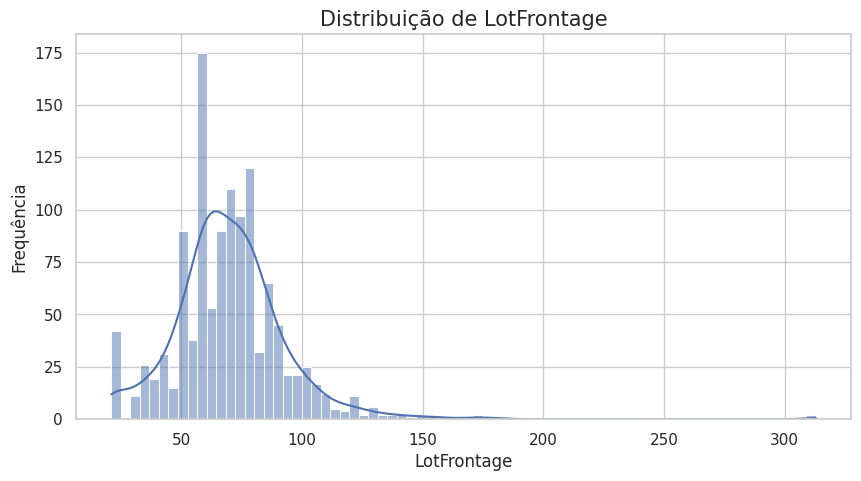

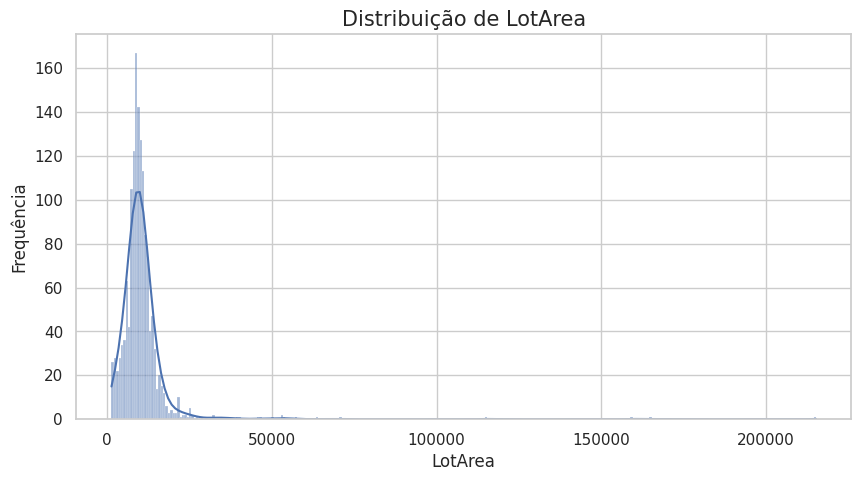

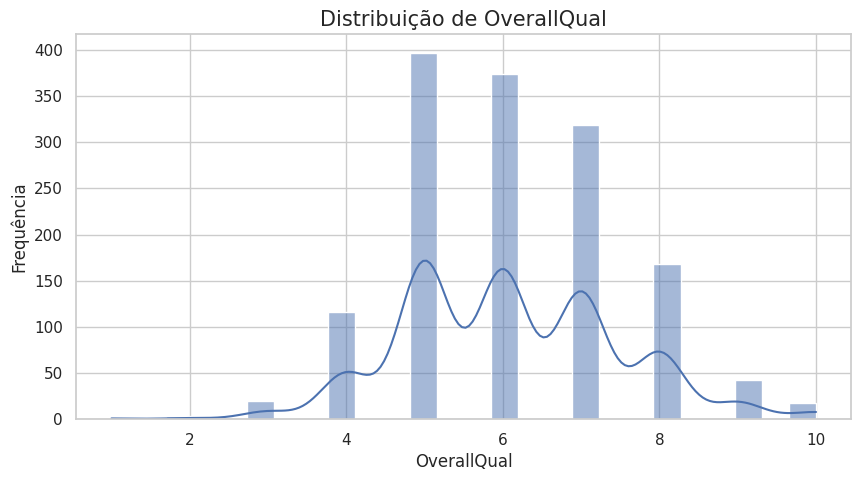

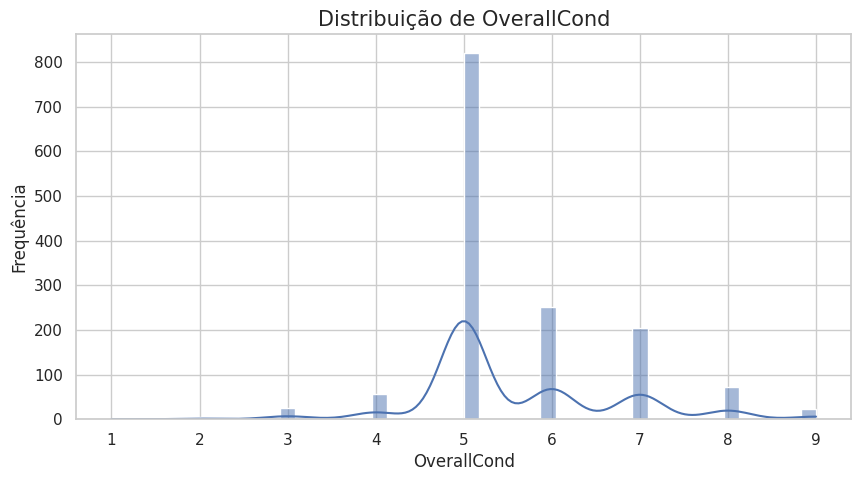

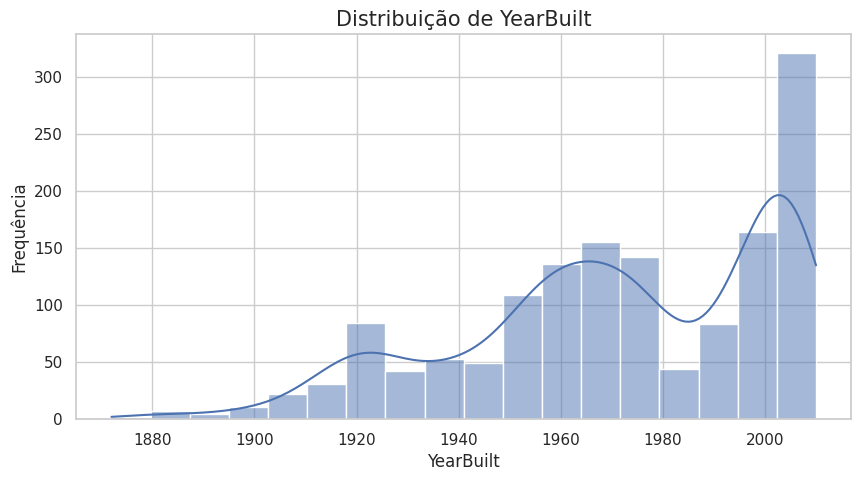

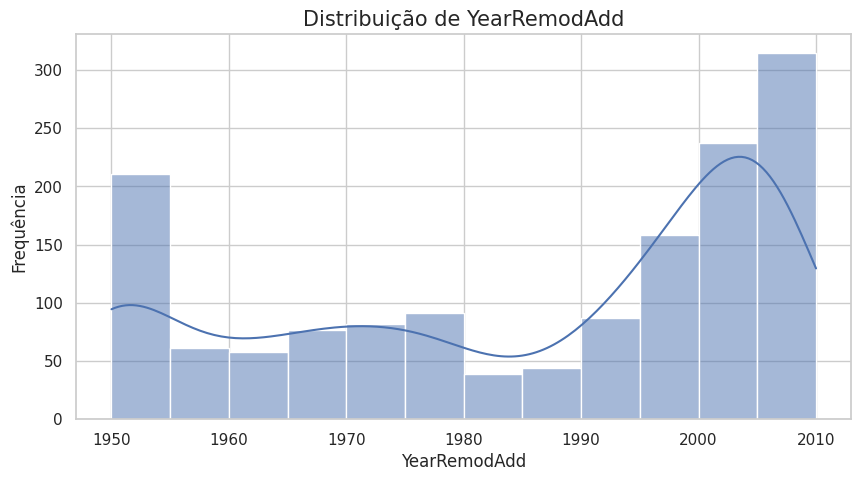

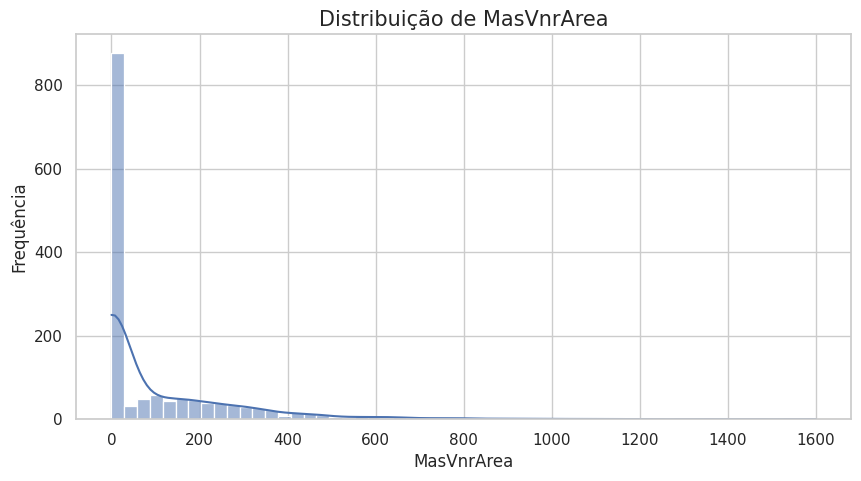

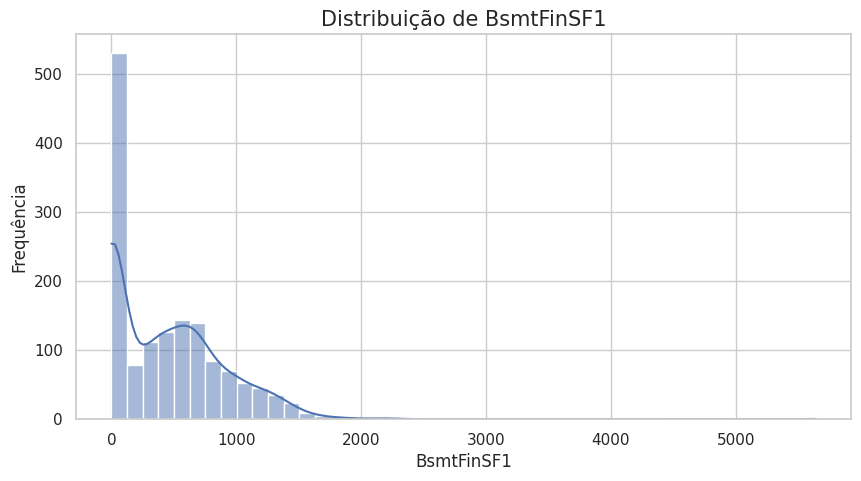

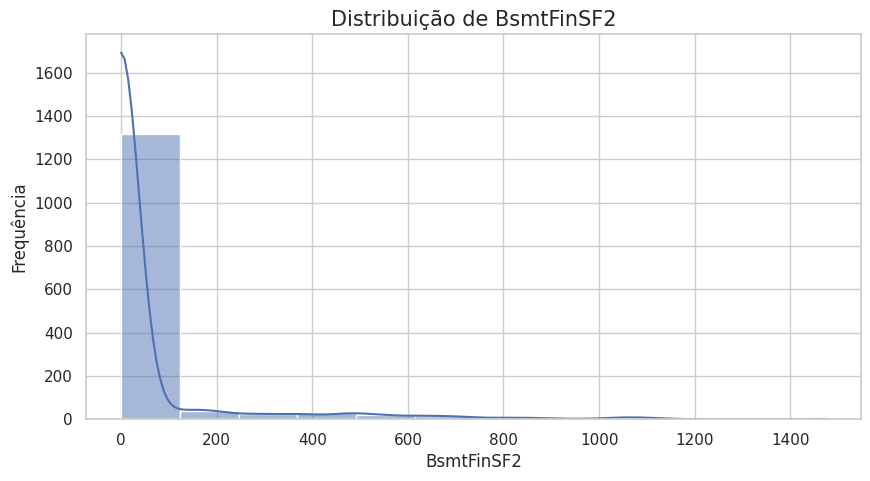

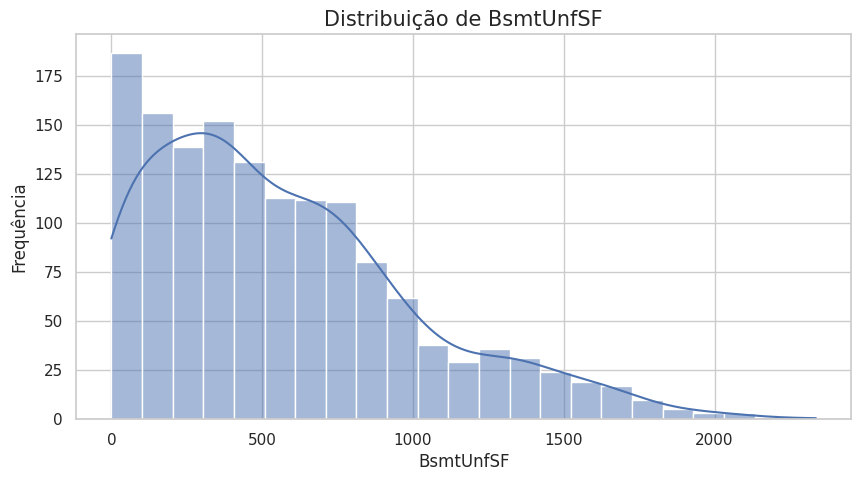

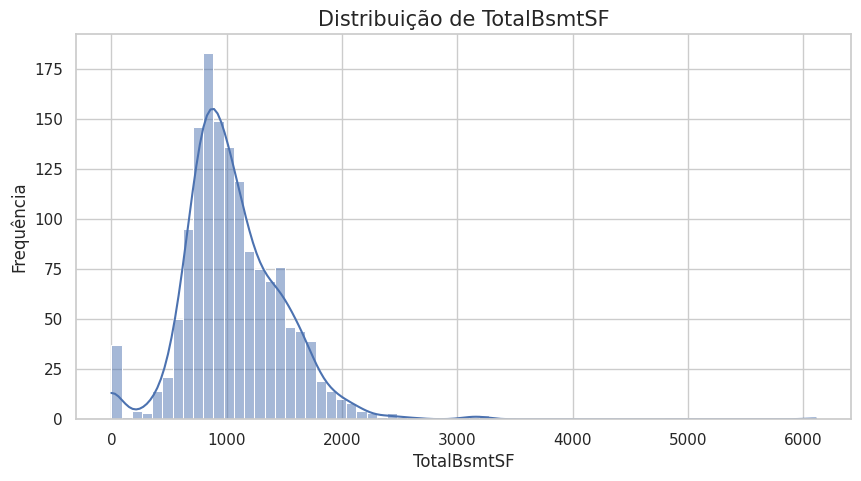

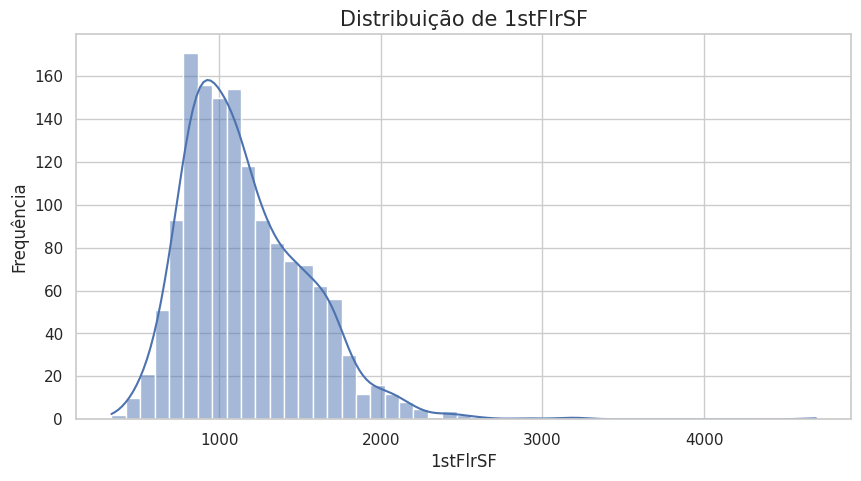

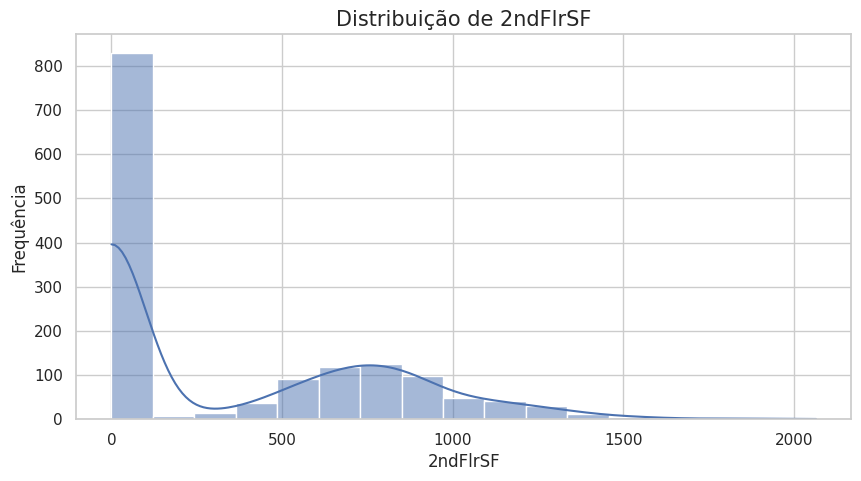

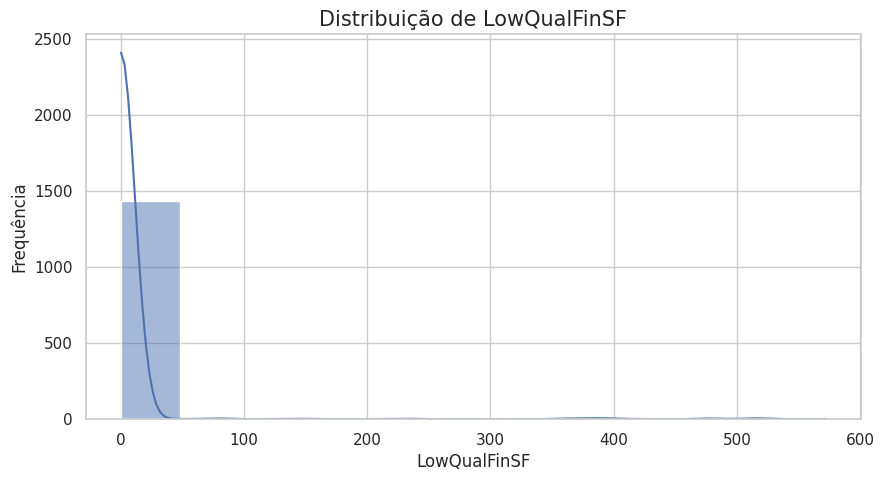

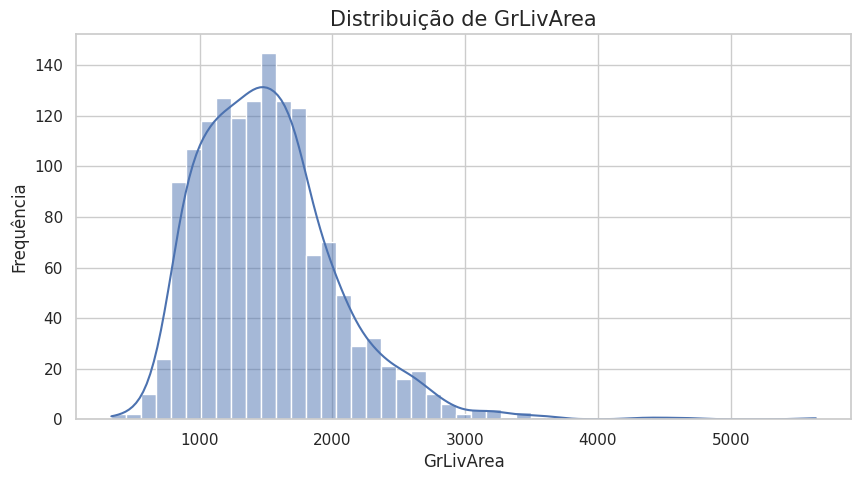

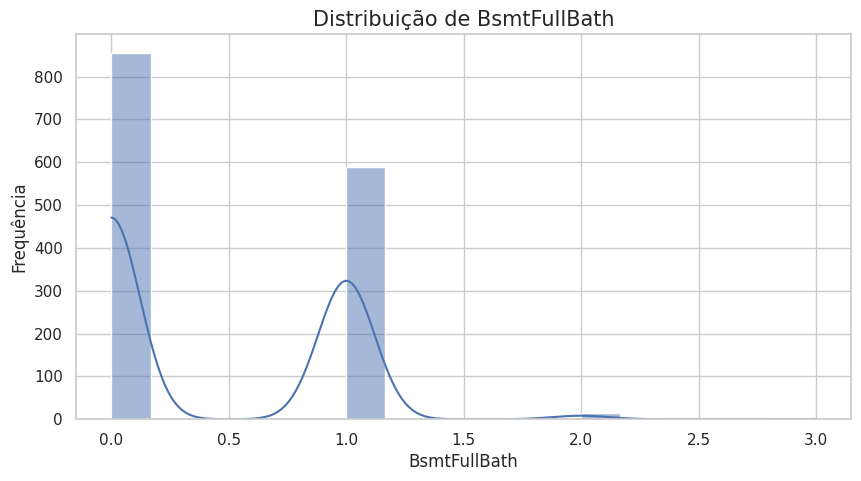

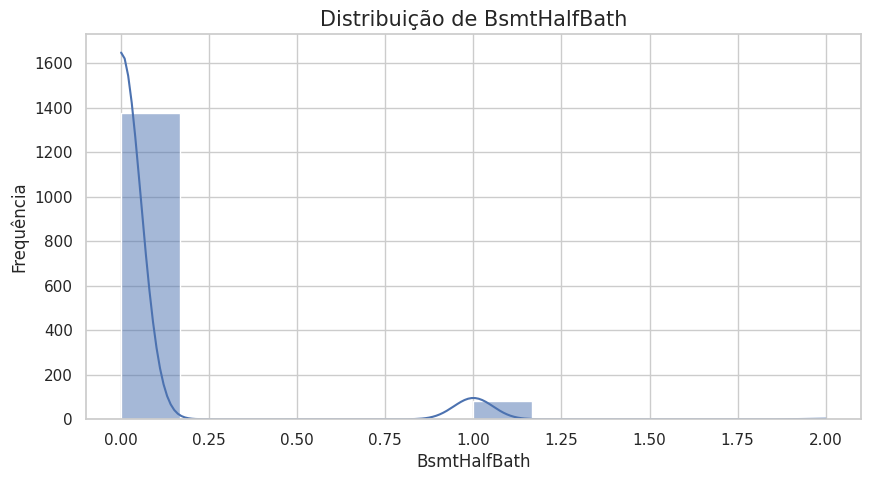

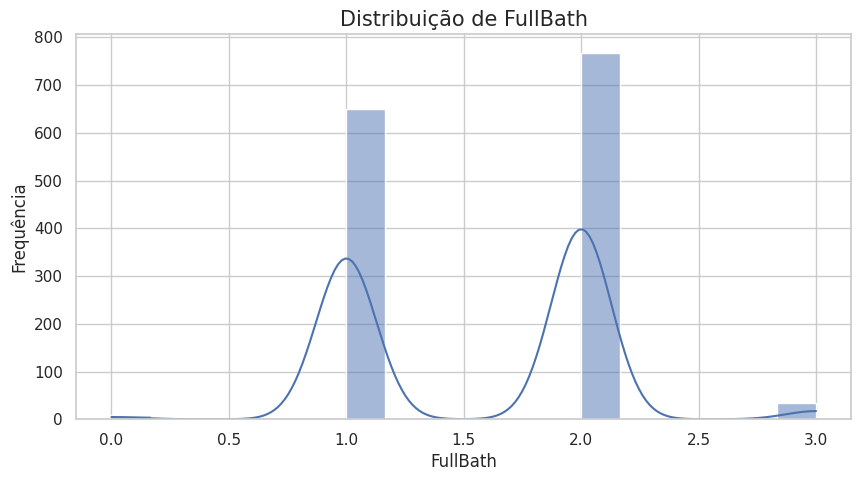

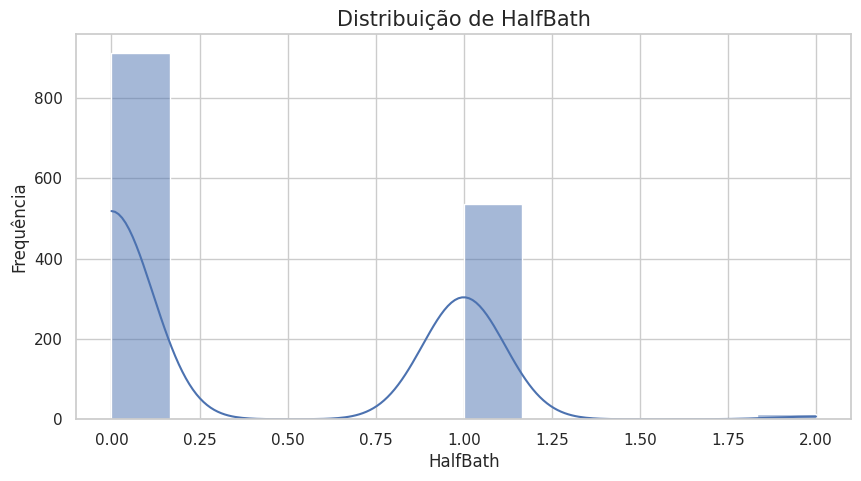

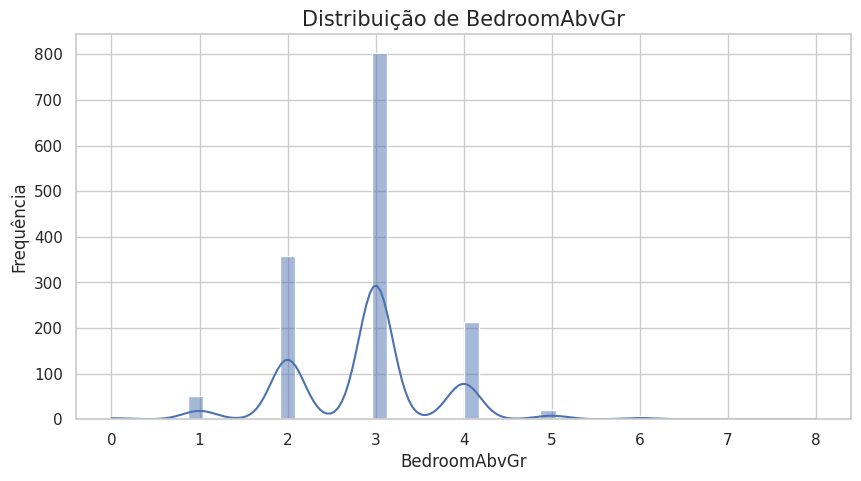

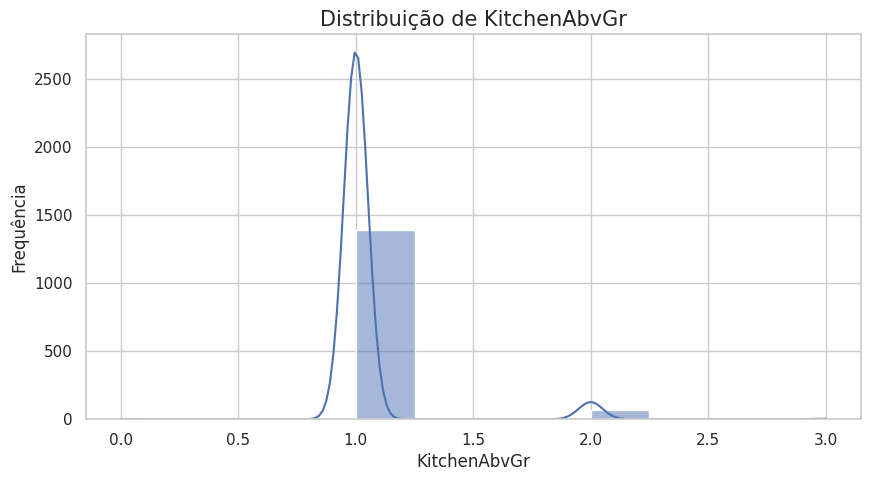

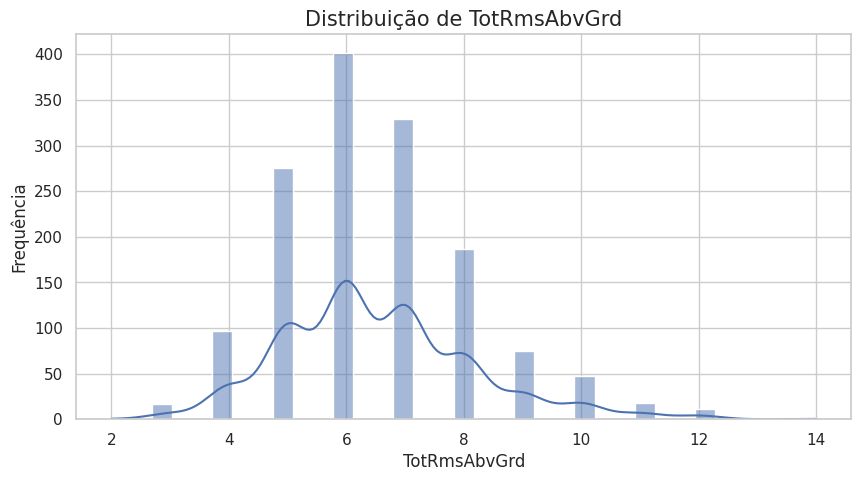

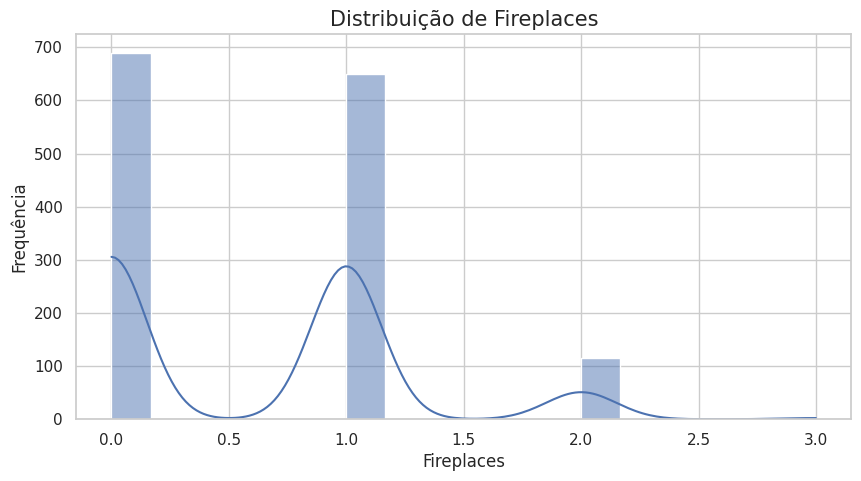

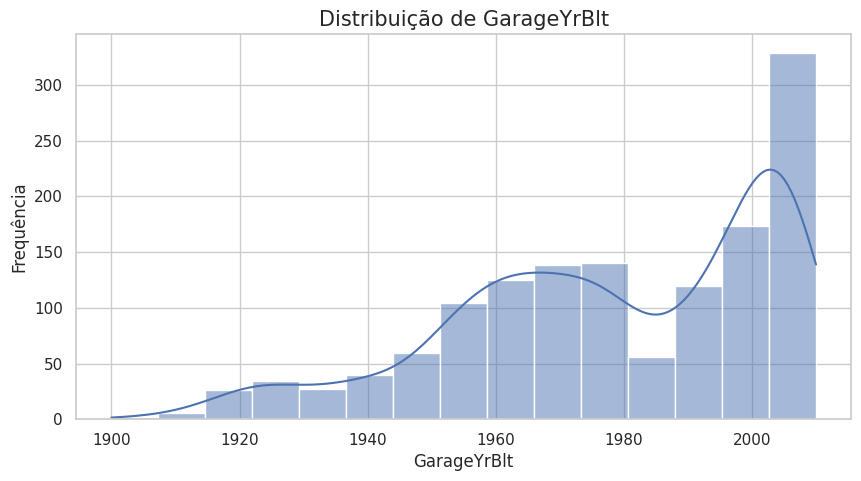

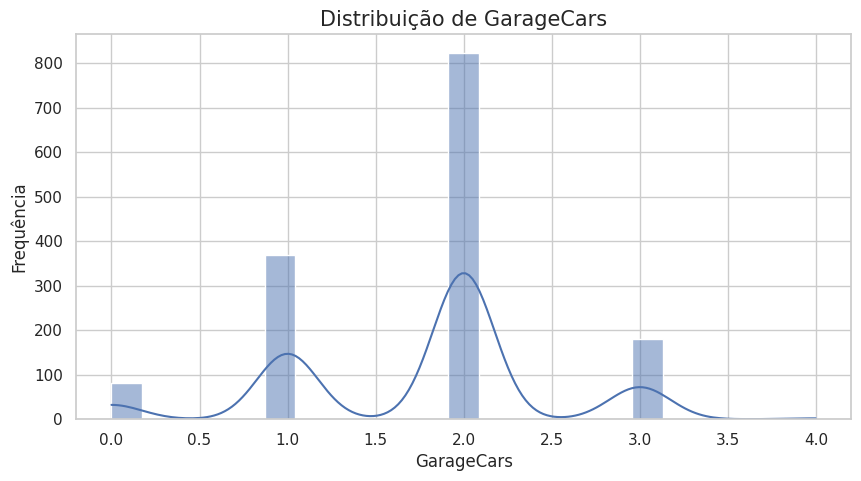

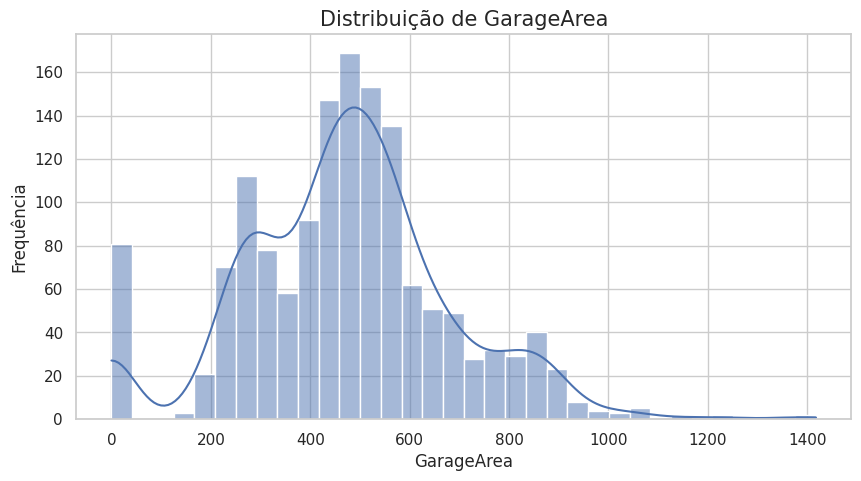

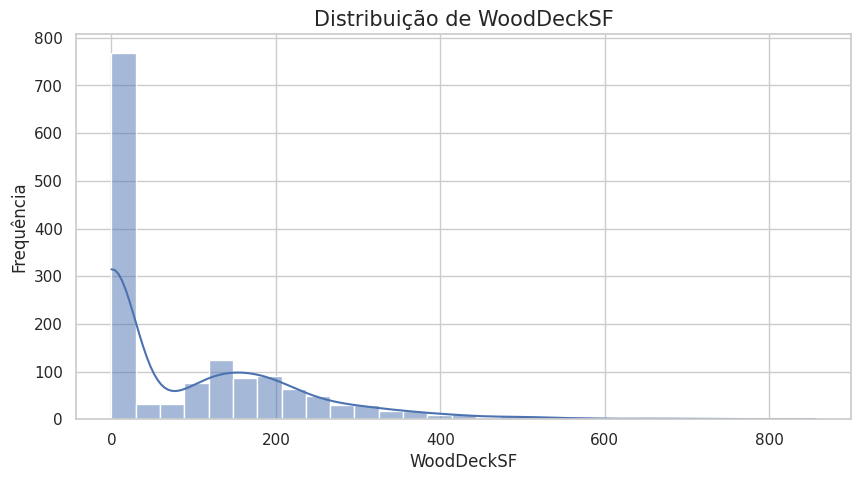

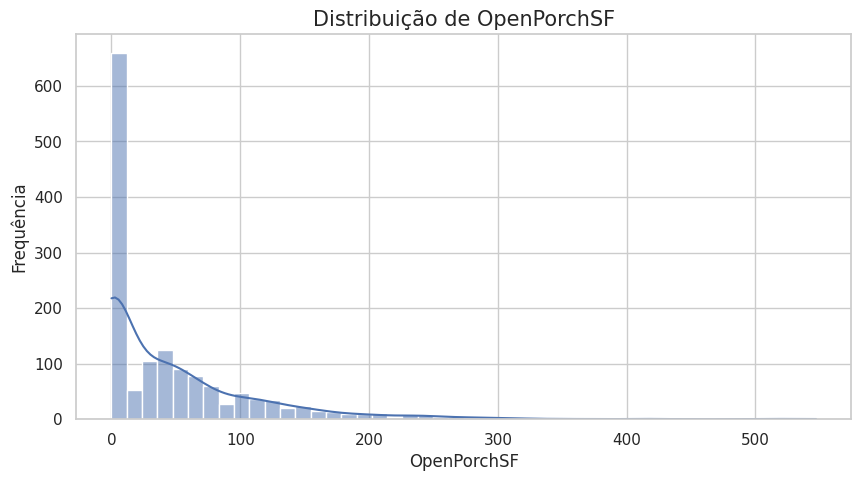

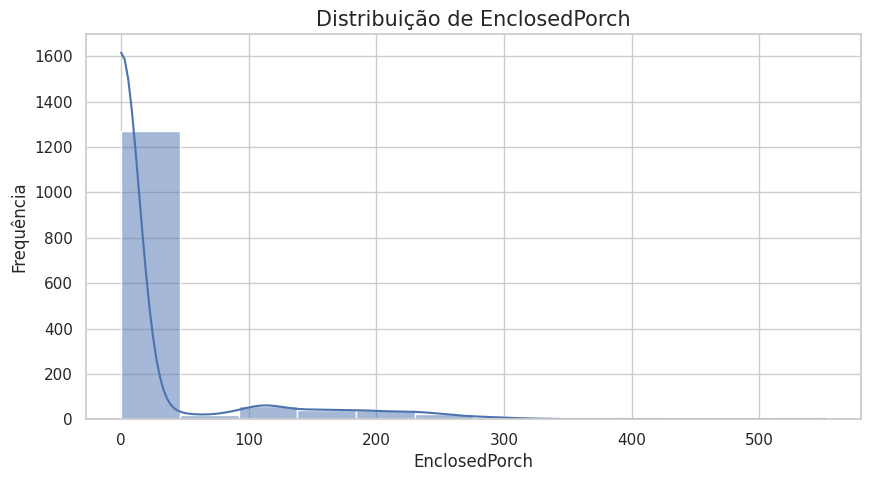

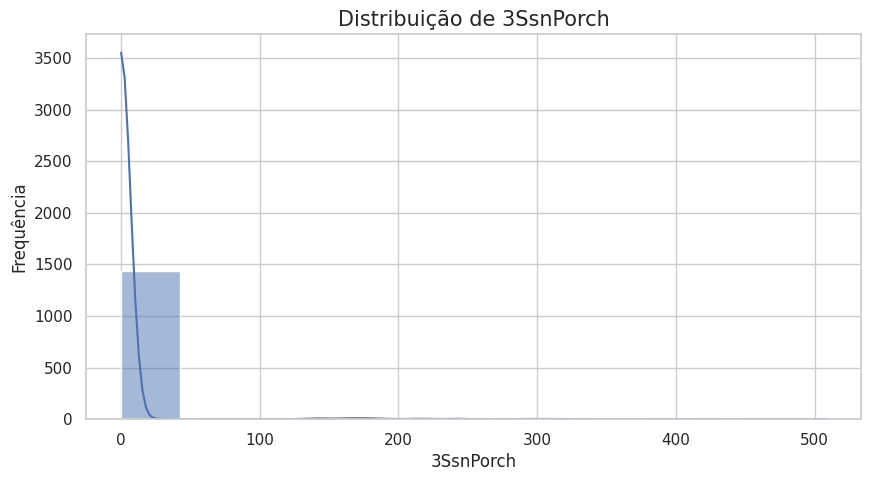

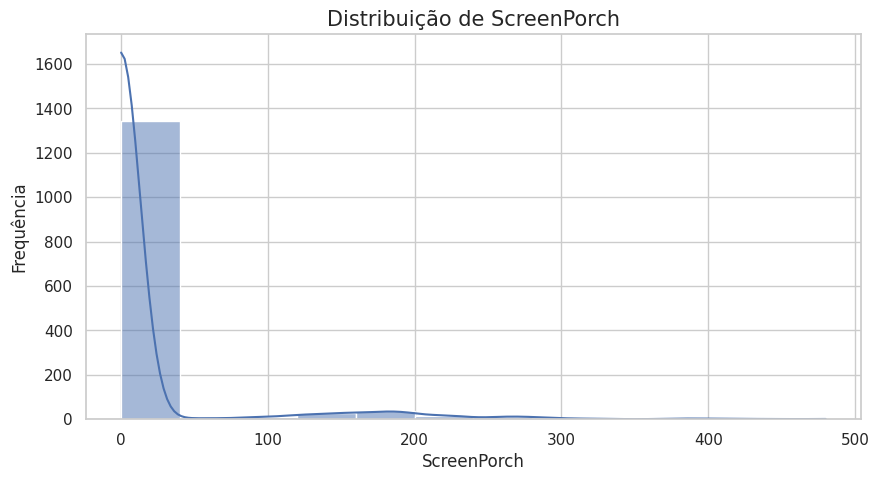

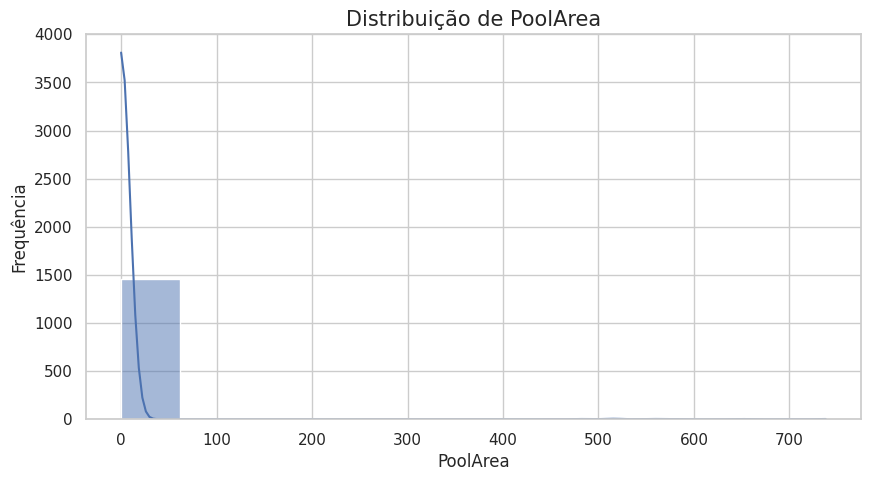

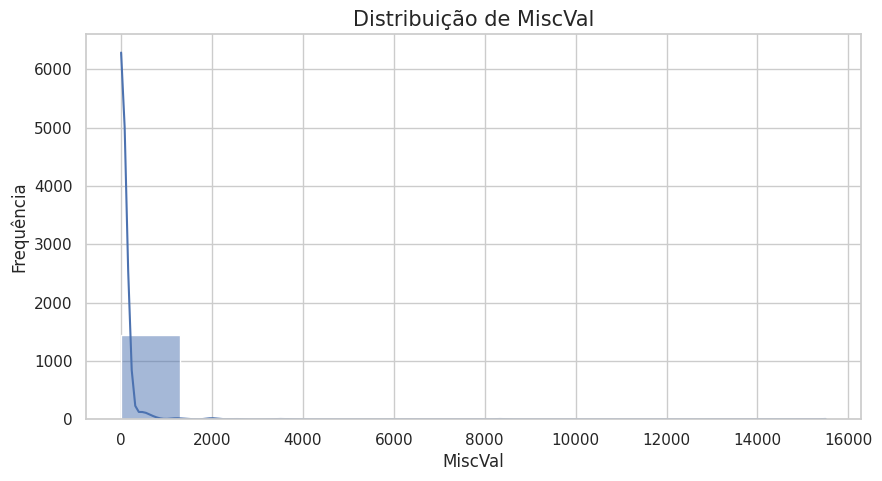

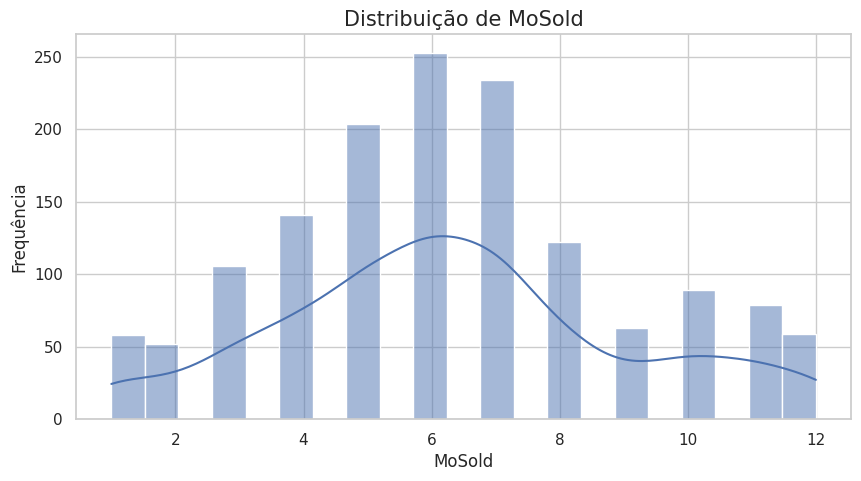

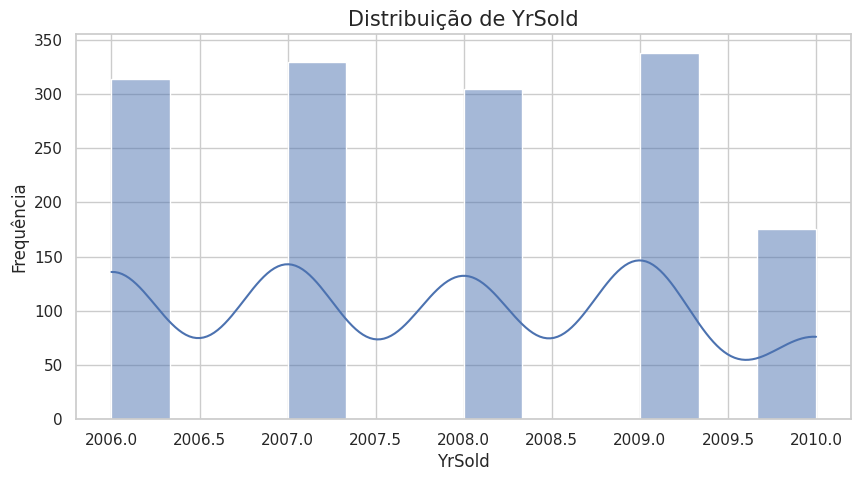

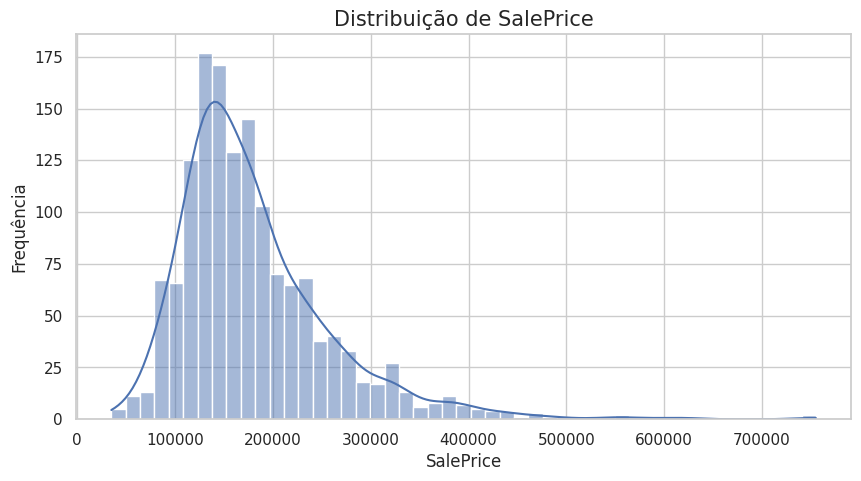

In [11]:
df_analise = df.drop('Id', axis=1)

# 2. Criar uma lista de colunas numéricas
colunas_numericas = df_analise.select_dtypes(include='number').columns.tolist()

# 3. Criar uma lista de colunas categóricas (tipo 'object')
colunas_categoricas = df_analise.select_dtypes(include='object').columns.tolist()

print("Colunas Numéricas:", colunas_numericas)
print("\nColunas Categóricas:", colunas_categoricas)

for col in colunas_numericas:
    plt.figure(figsize=(10, 5))  # Define o tamanho da figura para melhor visualização
    sns.histplot(data=df_analise, x=col, kde=True) # kde=True adiciona uma linha de densidade
    plt.title(f'Distribuição de {col}', fontsize=15)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.show()

